# MODELOS SIMPLES

## Regresión Logística Multinomial (Softmax)

## 1. Preparación de los datos

Como vimos en EL EDA, las imágenes son de $28 \times 28$. Para un modelo lineal, debemos "aplanarlas" (flatten) a un vector de $784$ dimensiones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 1. Carga de datos
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Normalización (Escalar de [0, 255] a [0, 1])
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. División Entrenamiento / Validación (Regla de oro: SIEMPRE separar Val)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (48000, 28, 28), y_train shape: (48000,)
X_val shape: (12000, 28, 28), y_val shape: (12000,)
X_test shape: (10000, 28, 28), y_test shape: (10000,)


## 2. Definición del Modelo Softmax

La función de activación Softmax para $K$ clases se define como:

$$\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$

Utilizaremos la función de pérdida Sparse Categorical Cross-Entropy:

$$\mathcal{L} = -\sum_{i=1}^K y_i \log(\hat{y}_i)$$

In [3]:
def build_linear_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)), # Aplanamos la entrada X
        layers.Dense(10, activation='softmax') # Una sola capa densa = Modelo lineal
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_linear = build_linear_model()
model_linear.summary()

d:\Uni\Aprendizaje profundo\ProyectoAP\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Entrenamiento y Curvas

Vamos a ver si el modelo converge.

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.7887 - loss: 0.6294 - val_accuracy: 0.8292 - val_loss: 0.4977
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.8370 - loss: 0.4771 - val_accuracy: 0.8453 - val_loss: 0.4473
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - accuracy: 0.8469 - loss: 0.4481 - val_accuracy: 0.8513 - val_loss: 0.4351
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.8518 - loss: 0.4311 - val_accuracy: 0.8550 - val_loss: 0.4158
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - accuracy: 0.8543 - loss: 0.4223 - val_accuracy: 0.8592 - val_loss: 0.4112
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.8566 - loss: 0.4144 - val_accuracy: 0.8572 - val_loss: 0.4142
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.8579 - loss: 0.4093 - val_accuracy: 0.8628 - val_loss: 0.4018
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.8615 -

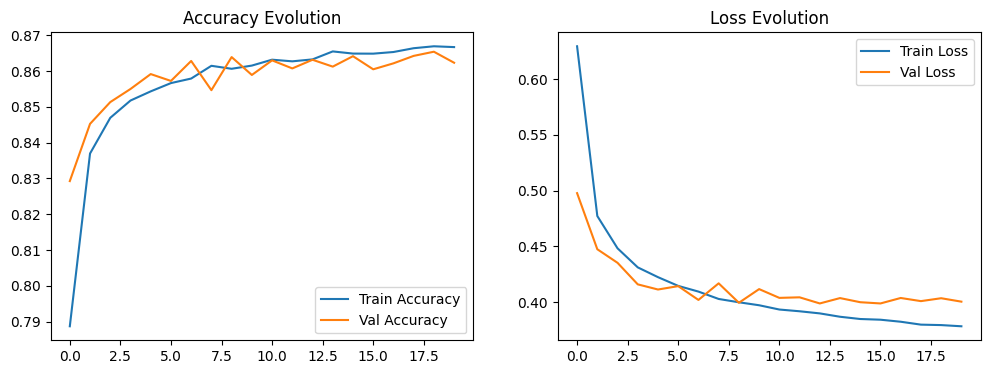

In [4]:
history = model_linear.fit(X_train, y_train,
                           epochs=20,
                           batch_size=32,
                           validation_data=(X_val, y_val),
                           verbose=1)

# Visualización de curvas
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Evolution')
plt.legend()
plt.show()

## 4. Matriz de Confusión

Visualizamos dónde se confunde el modelo utilizando el conjunto de test.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


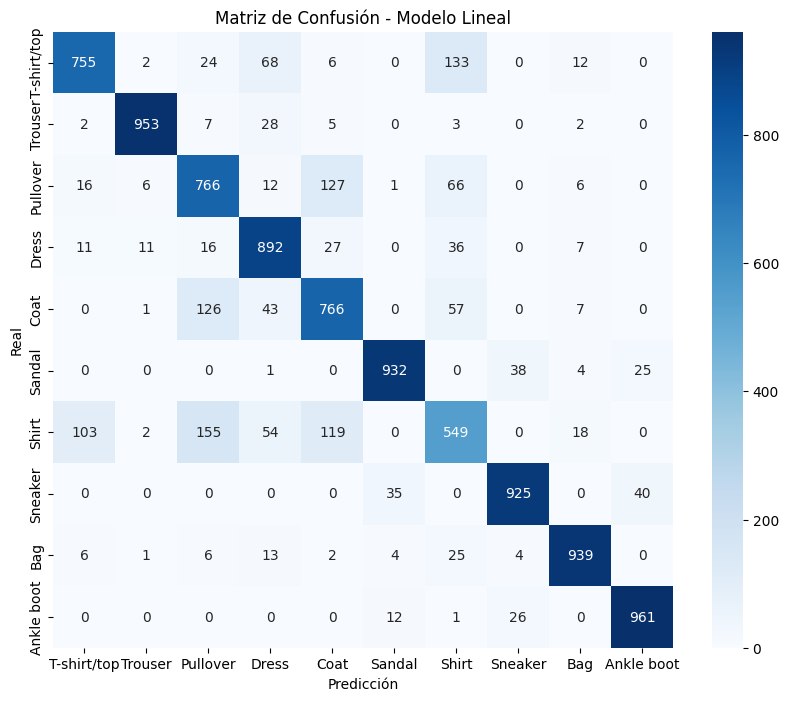

In [5]:
y_pred = np.argmax(model_linear.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Modelo Lineal')
plt.show()

## 5. Evaluación Final

In [ ]:
train_loss, train_acc = model_linear.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model_linear.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model_linear.evaluate(X_test, y_test, verbose=0)

n_params = model_linear.count_params()

print(f"Resultados finales:")
print(f" - Train Acc: {train_acc:.4f}")
print(f" - Val Acc:   {val_acc:.4f}")
print(f" - Test Acc:  {test_acc:.4f}")
print(f" - Parámetros: {n_params}")

## Resumen de Resultados - Modelo Lineal

| Modelo | Parámetros | Train Acc | Val Acc | Test Acc |
| :--- | :---: | :---: | :---: | :---: |
| **Softmax (Baseline)** | 7,850 | 0.8700 | 0.8618 | **0.8451** |

Hemos implementado una Regresión Logística Multinomial (Softmax). Es el modelo más básico posible, donde cada píxel se conecta directamente a la salida.

Tenemos 7,850 parámetros. Es un modelo "ligero" que busca fronteras de decisión lineales (hiperplanos).

Rendimiento:

Train: 87.00% | Val: 86.18% | Test: 84.51%

Poco overfitting (brecha < 3%). El modelo generaliza bien, pero tiene un "techo" de aprendizaje debido a su simplicidad.

El ~84% de acierto confirma que las clases son distinguibles por su silueta general, pero el modelo falla en prendas con formas similares (camisetas vs. camisas) porque no puede entender texturas o detalles complejos.